In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decoupler as dc
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline




In [2]:
progeny = dc.get_progeny(organism='human', top=500)


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


In [4]:
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9.lesionalonly')


In [5]:
adata_lesional.raw = ad.AnnData(adata_lesional.layers["counts"].copy(), var=adata_lesional.var.copy(), obs=adata_lesional.obs.copy())


In [7]:
dc.run_mlm(
    mat=adata_lesional,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

1974 features of mat are empty, they will be removed.
Running mlm on mat with 190756 samples and 34627 targets for 14 sources.


100%|██████████| 20/20 [11:16<00:00, 33.84s/it]


In [8]:
acts = dc.get_acts(adata_lesional, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 190756 × 14
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'leiden_res1', 'test', 'corefb_names', 'lvl3_annotation_uncert', 'lvl3_annotation_pred', 'leiden_res0.5', 'merged_annotations', 'test3', 'test4', 'test5', 'test6', 'leiden_res0.7', 'test7', 'lvl3_annotation_pred2', 'test8', 'test9', 'test10', 'test11', 'disease_category', 'macfb', 'macfb2', 'test12', 'test13', 'test14', 'test15', 'test1

# nonlesional

In [9]:
import scanpy as sc
adata_nonlesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v3')
adata_nonlesional.obs.corefb_names2.value_counts()

corefb_names2
F2: Universal          60120
F2/3: Stroma_PPARG+    29376
F1: Superficial        27427
F4: DS_DPEP1+          19969
F3: FRC-like           19884
F4: TNN+COCH+           3604
F5: NGFR+               2769
F5: RAMP1+              1535
F4: DP_HHIP+             965
Name: count, dtype: int64

In [10]:
adata_nonlesional=adata_nonlesional[adata_nonlesional.obs["Patient_status"]=="Healthy"]

In [11]:
adata_nonlesional.raw = ad.AnnData(adata_nonlesional.layers["counts"].copy(), var=adata_nonlesional.var.copy(), obs=adata_nonlesional.obs.copy())


In [12]:
dc.run_mlm(
    mat=adata_nonlesional,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

3256 features of mat are empty, they will be removed.
Running mlm on mat with 100837 samples and 33345 targets for 14 sources.


100%|██████████| 11/11 [05:42<00:00, 31.13s/it]


In [13]:
acts2 = dc.get_acts(adata_nonlesional, obsm_key='mlm_estimate')
acts2

AnnData object with n_obs × n_vars = 100837 × 14
    obs: 'sample_id', 'barcode', 'dataset_id', 'GSE', 'Site_status', 'Patient_status', 'DonorID', 'Location', 'Age', 'Sex', 'n_genes', 'OriginalAnnotation', 'Chemistry', 'lvl3_annotation', 'lvl2_annotation', 'lvl1_annotation', 'lvl0_annotation', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'QC_hi', 'QC_mid', 'leiden_res0.2', 'Site_status_binary', 'atlas_status_reynolds', 'atlas_status', 'Site_status2', 'Patient_status2', 'Sex_original', 'fb_vs_other', 'fb_vs_other2', 'core', 'fbs_pericytes_other', 'leiden_res1', 'leiden_res1.5', 'old_annotation', 'test', 'fbs', 'fbs2', 'fbs3', 'new_annotation3', 'new_annotation2', 'new_annotation1', 'new_annotation00', 'fb_status_figs', 'Location_original', 'Location_broad', 'Location_detailed', 'leiden_res0.5', 'tes

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


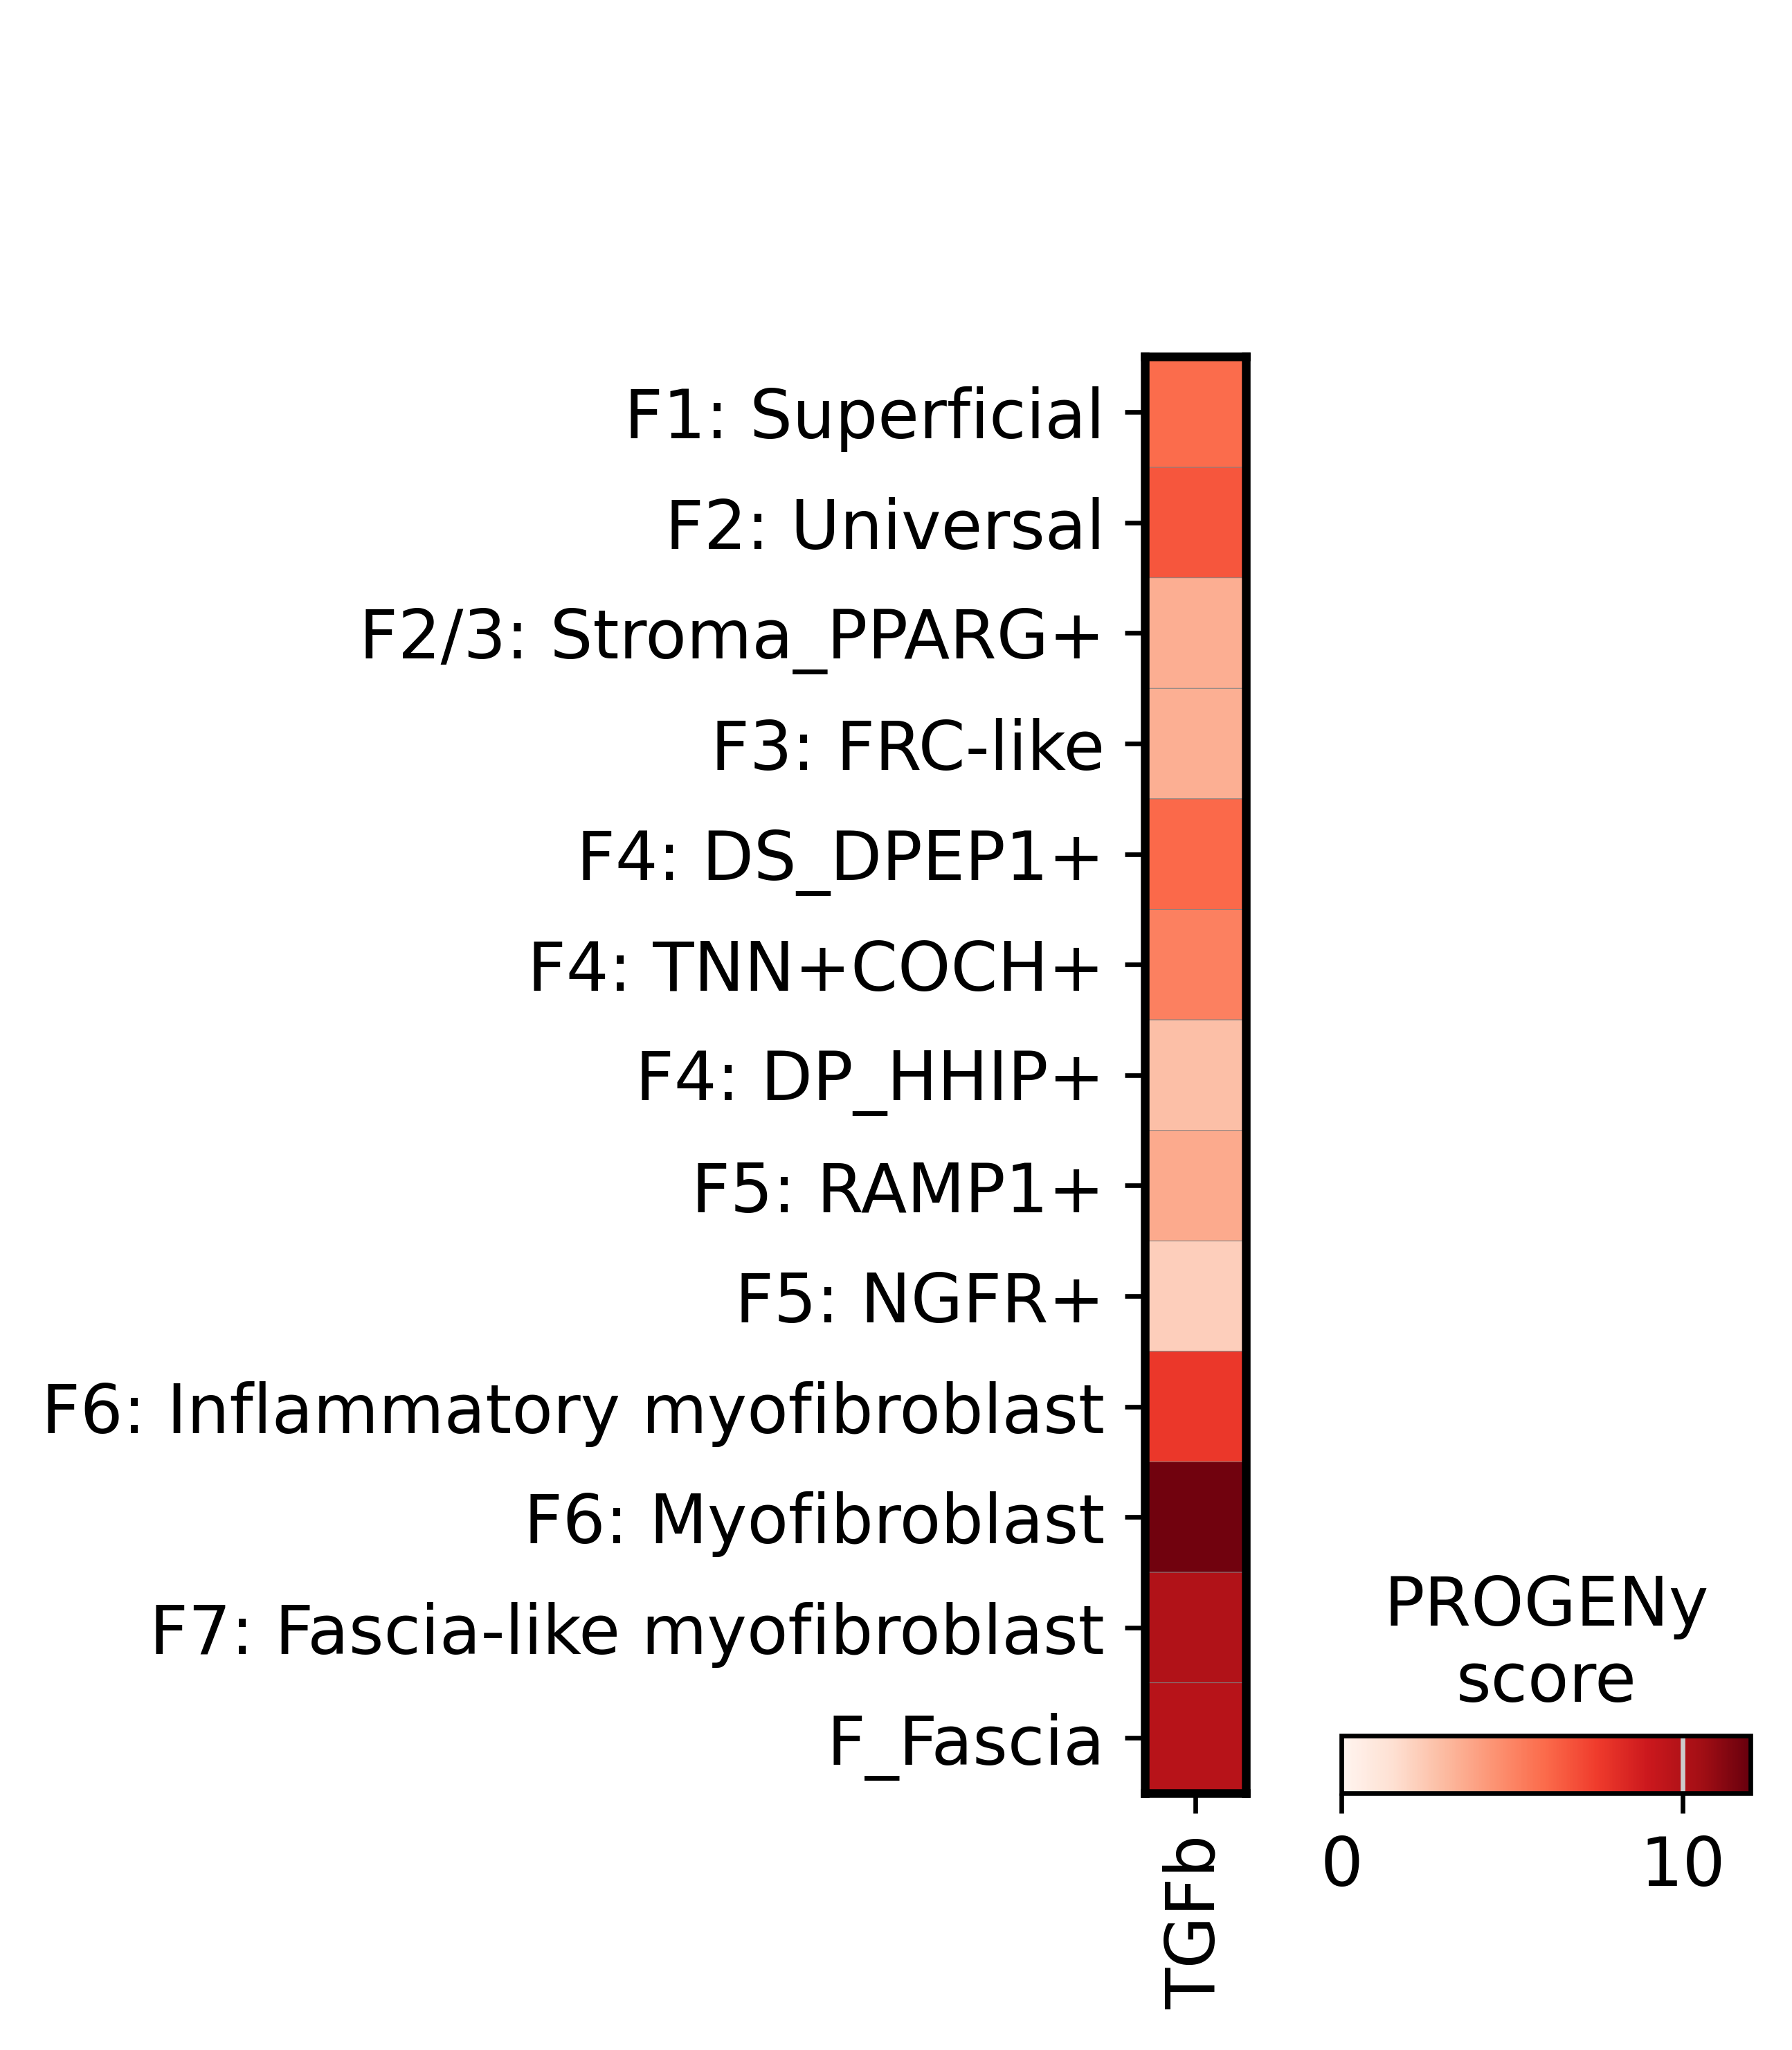

In [19]:
VMAX_VAL=12
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(18,18))

sc.pl.matrixplot(acts, var_names='TGFb', groupby='test13',# dendrogram=True, 
                 vmax=VMAX_VAL, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\nscore', 
                 cmap='Reds', #save="fig3progeny_tgfb_nonlesional.png"
                )

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


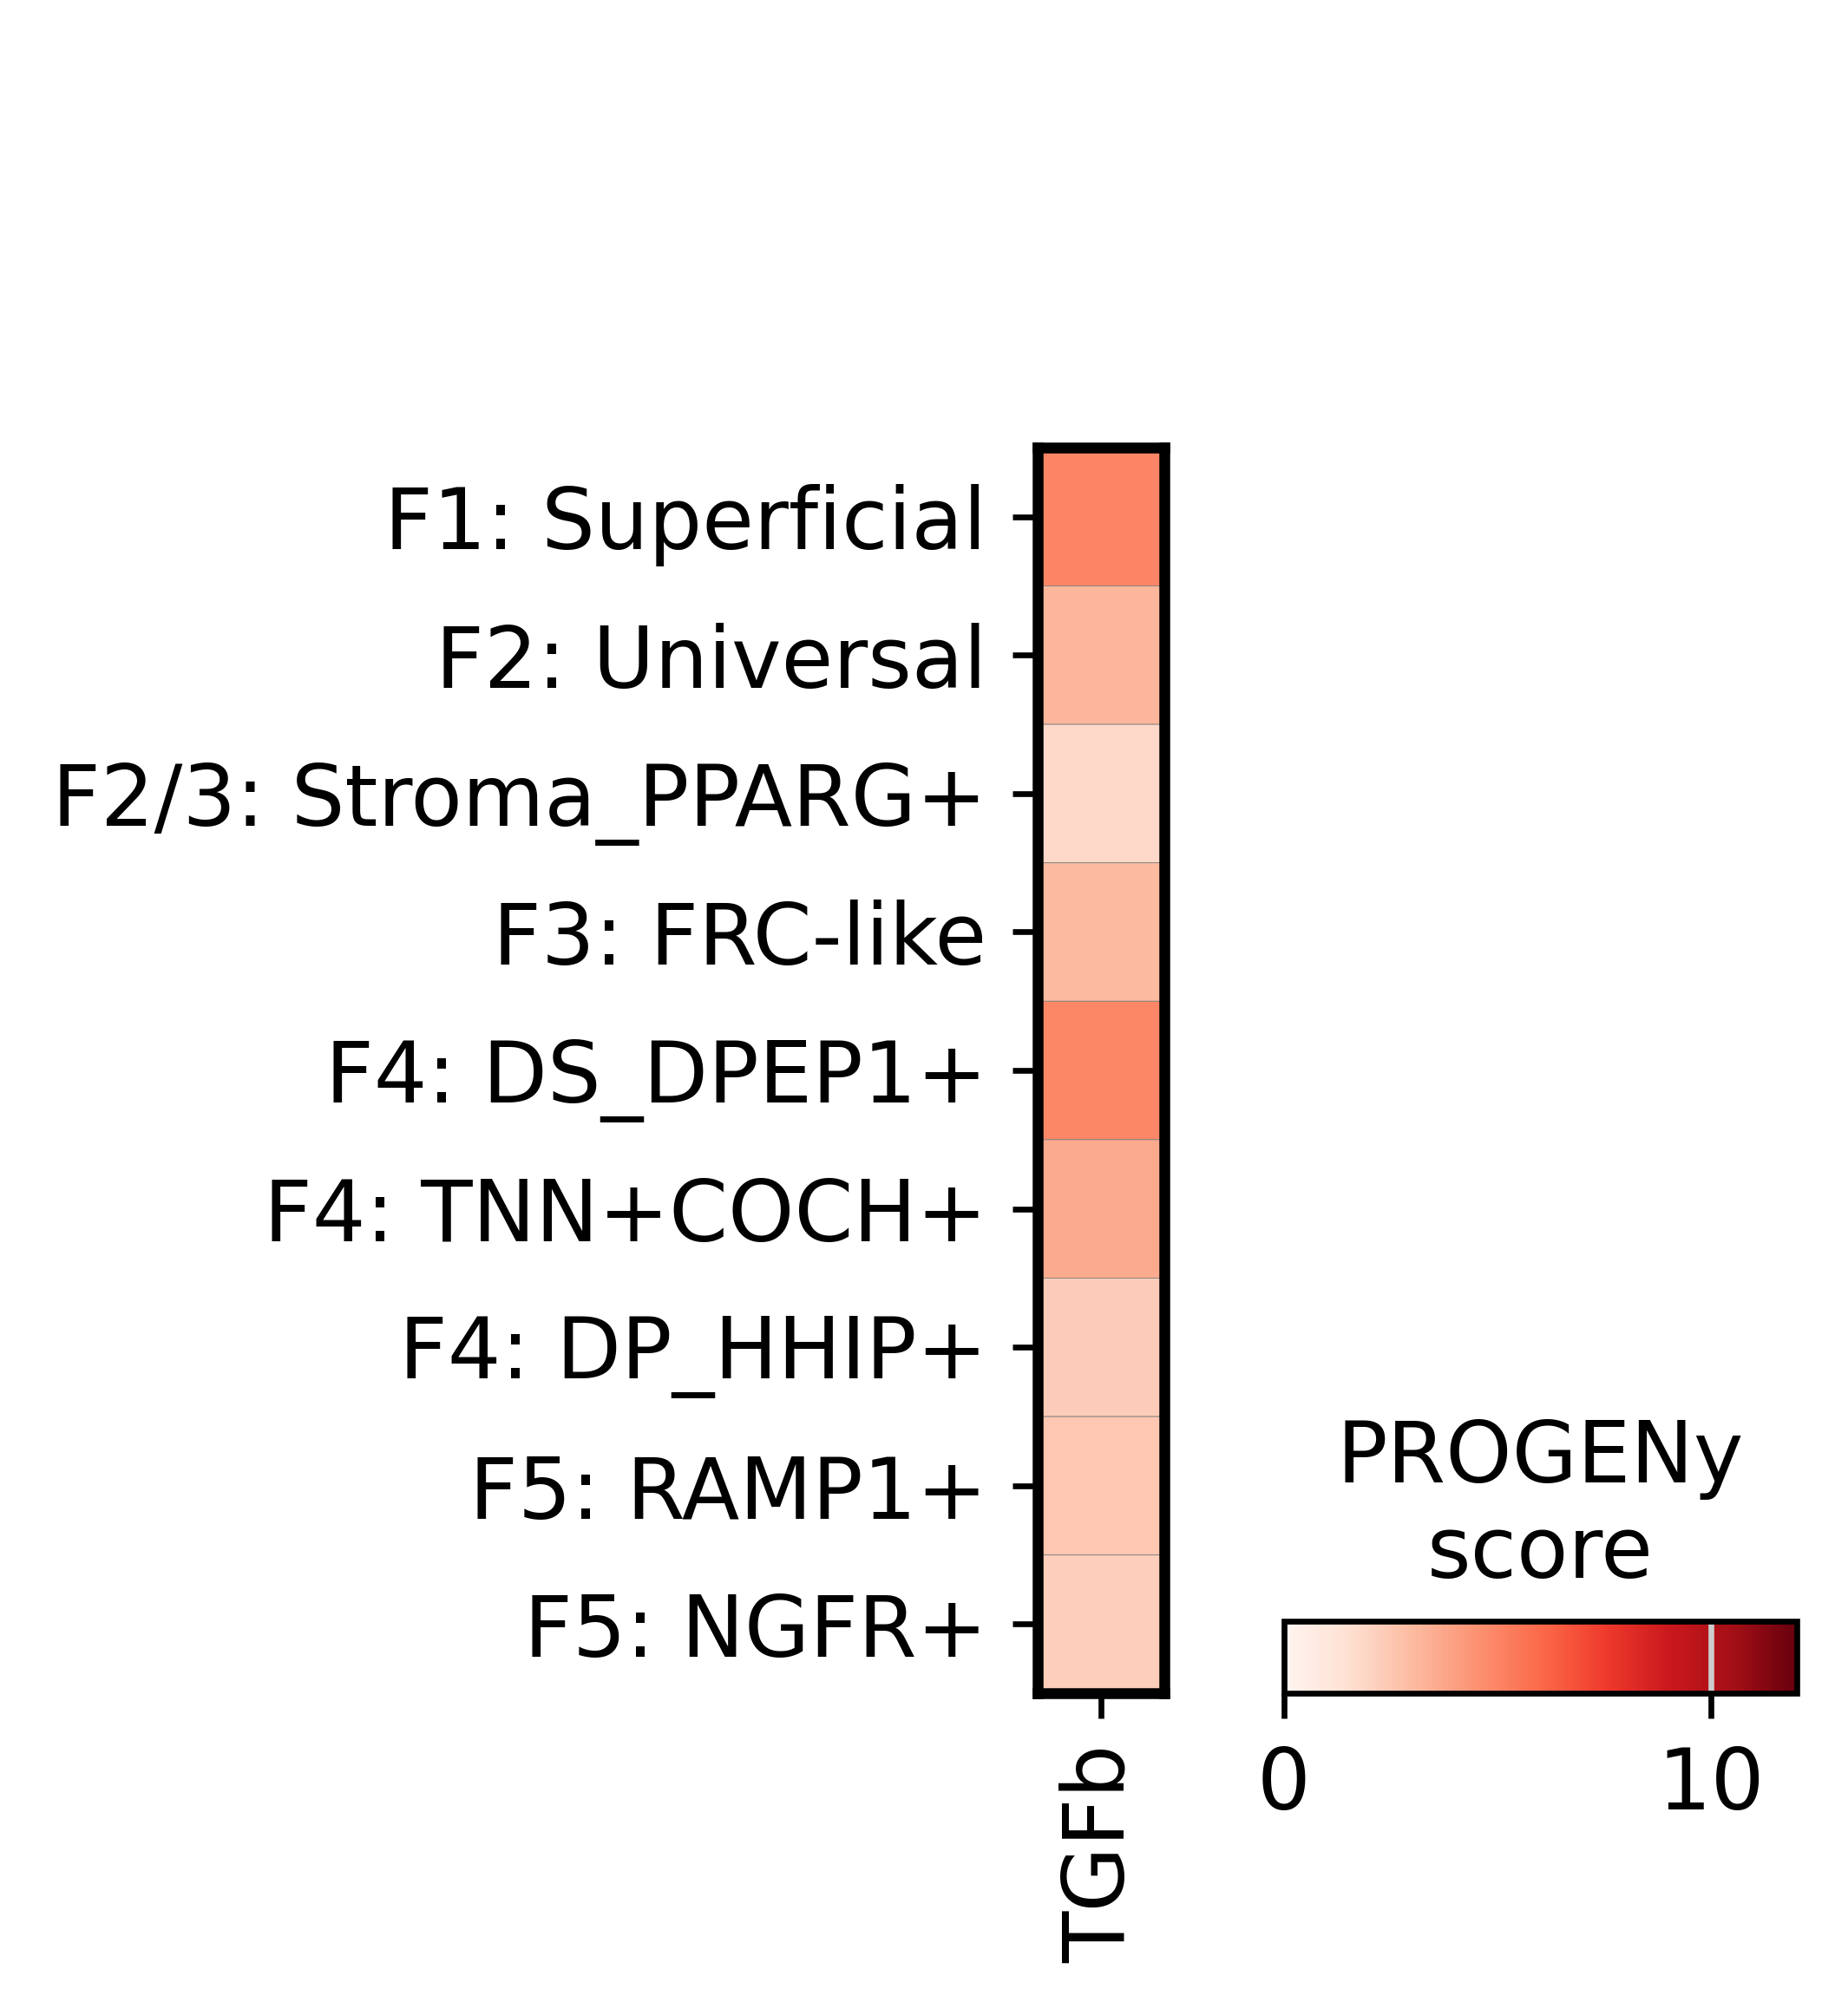

In [14]:
VMAX_VAL=12
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(18,18))

sc.pl.matrixplot(acts2, var_names='TGFb', groupby='corefb_names2',# dendrogram=True, 
                 vmax=VMAX_VAL, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\nscore', 
                 cmap='Reds', save="fig3progeny_tgfb_nonlesional.png")

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


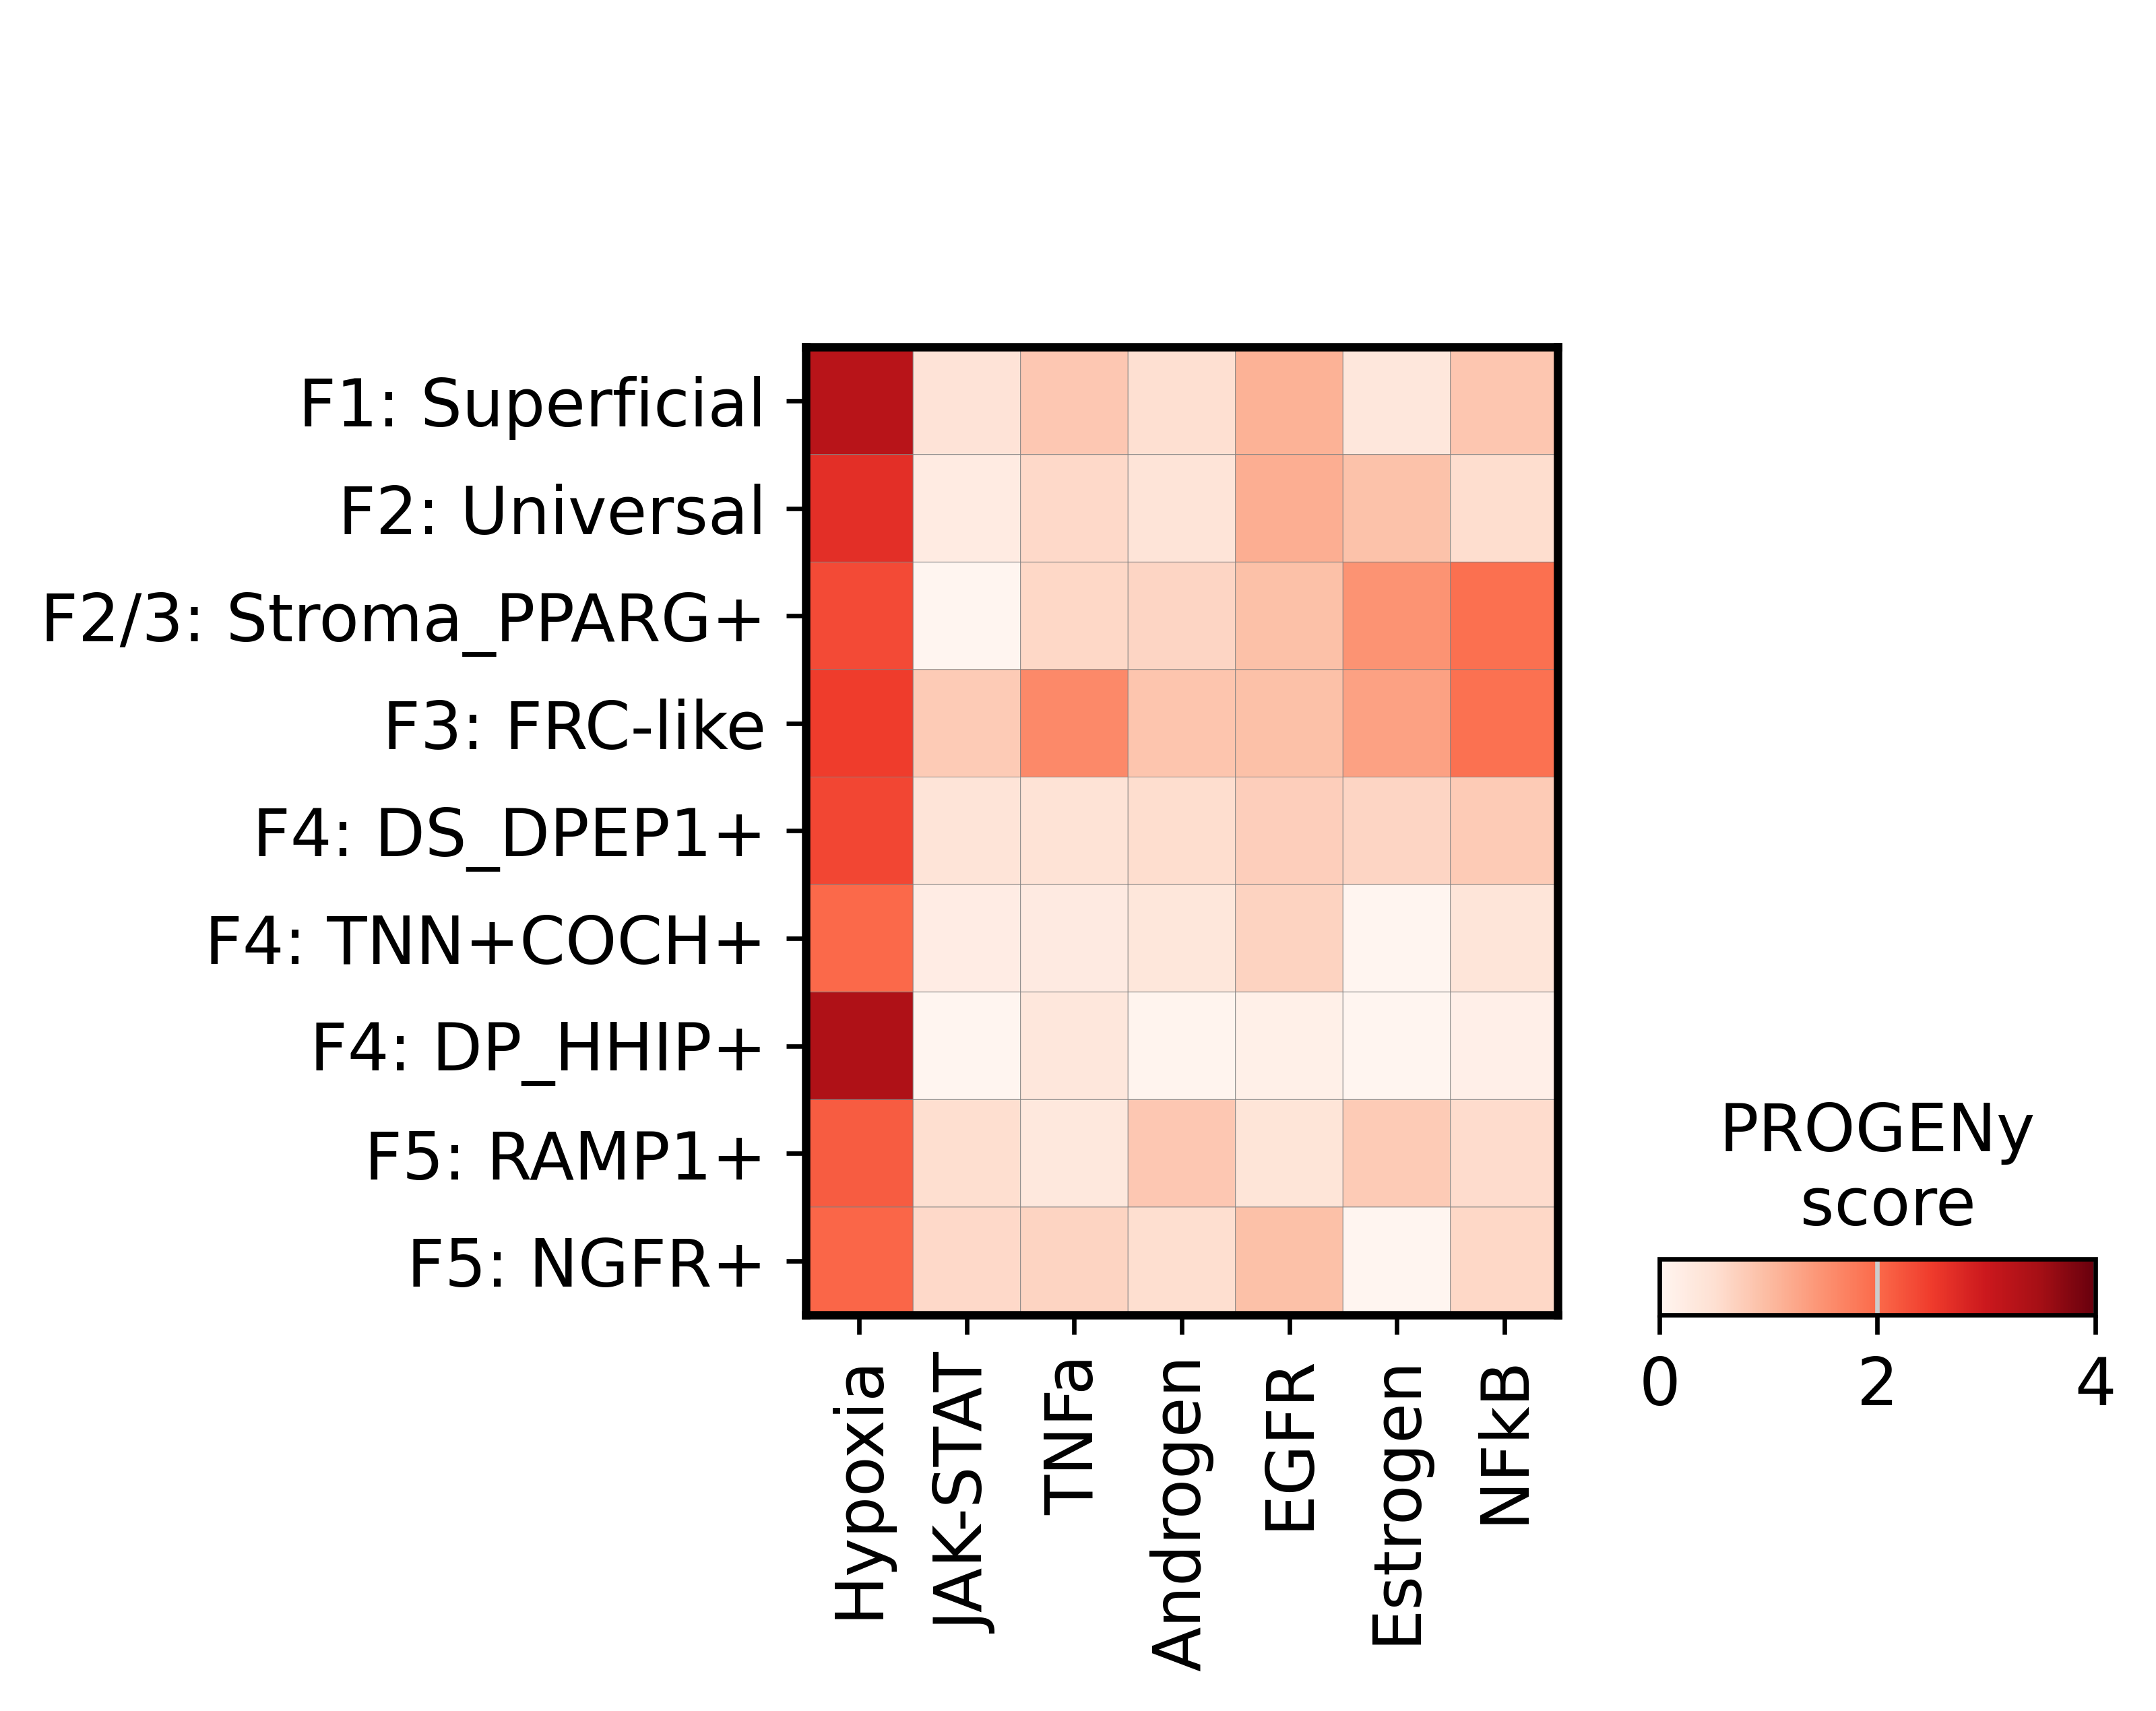

In [15]:
var_names_notgfb = [ 'Hypoxia','JAK-STAT', 'TNFa', 'Androgen', 'EGFR', 'Estrogen', 'NFkB',   ]#.pop("TGFb")

sc.pl.matrixplot(acts2, var_names=var_names_notgfb, groupby='corefb_names2',# dendrogram=True, 
                 vmax=4, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds',# swap_axes=True
                  save="fig3progeny_other_nonlesional2.png"
                )
# sc.pl.matrixplot(ac

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


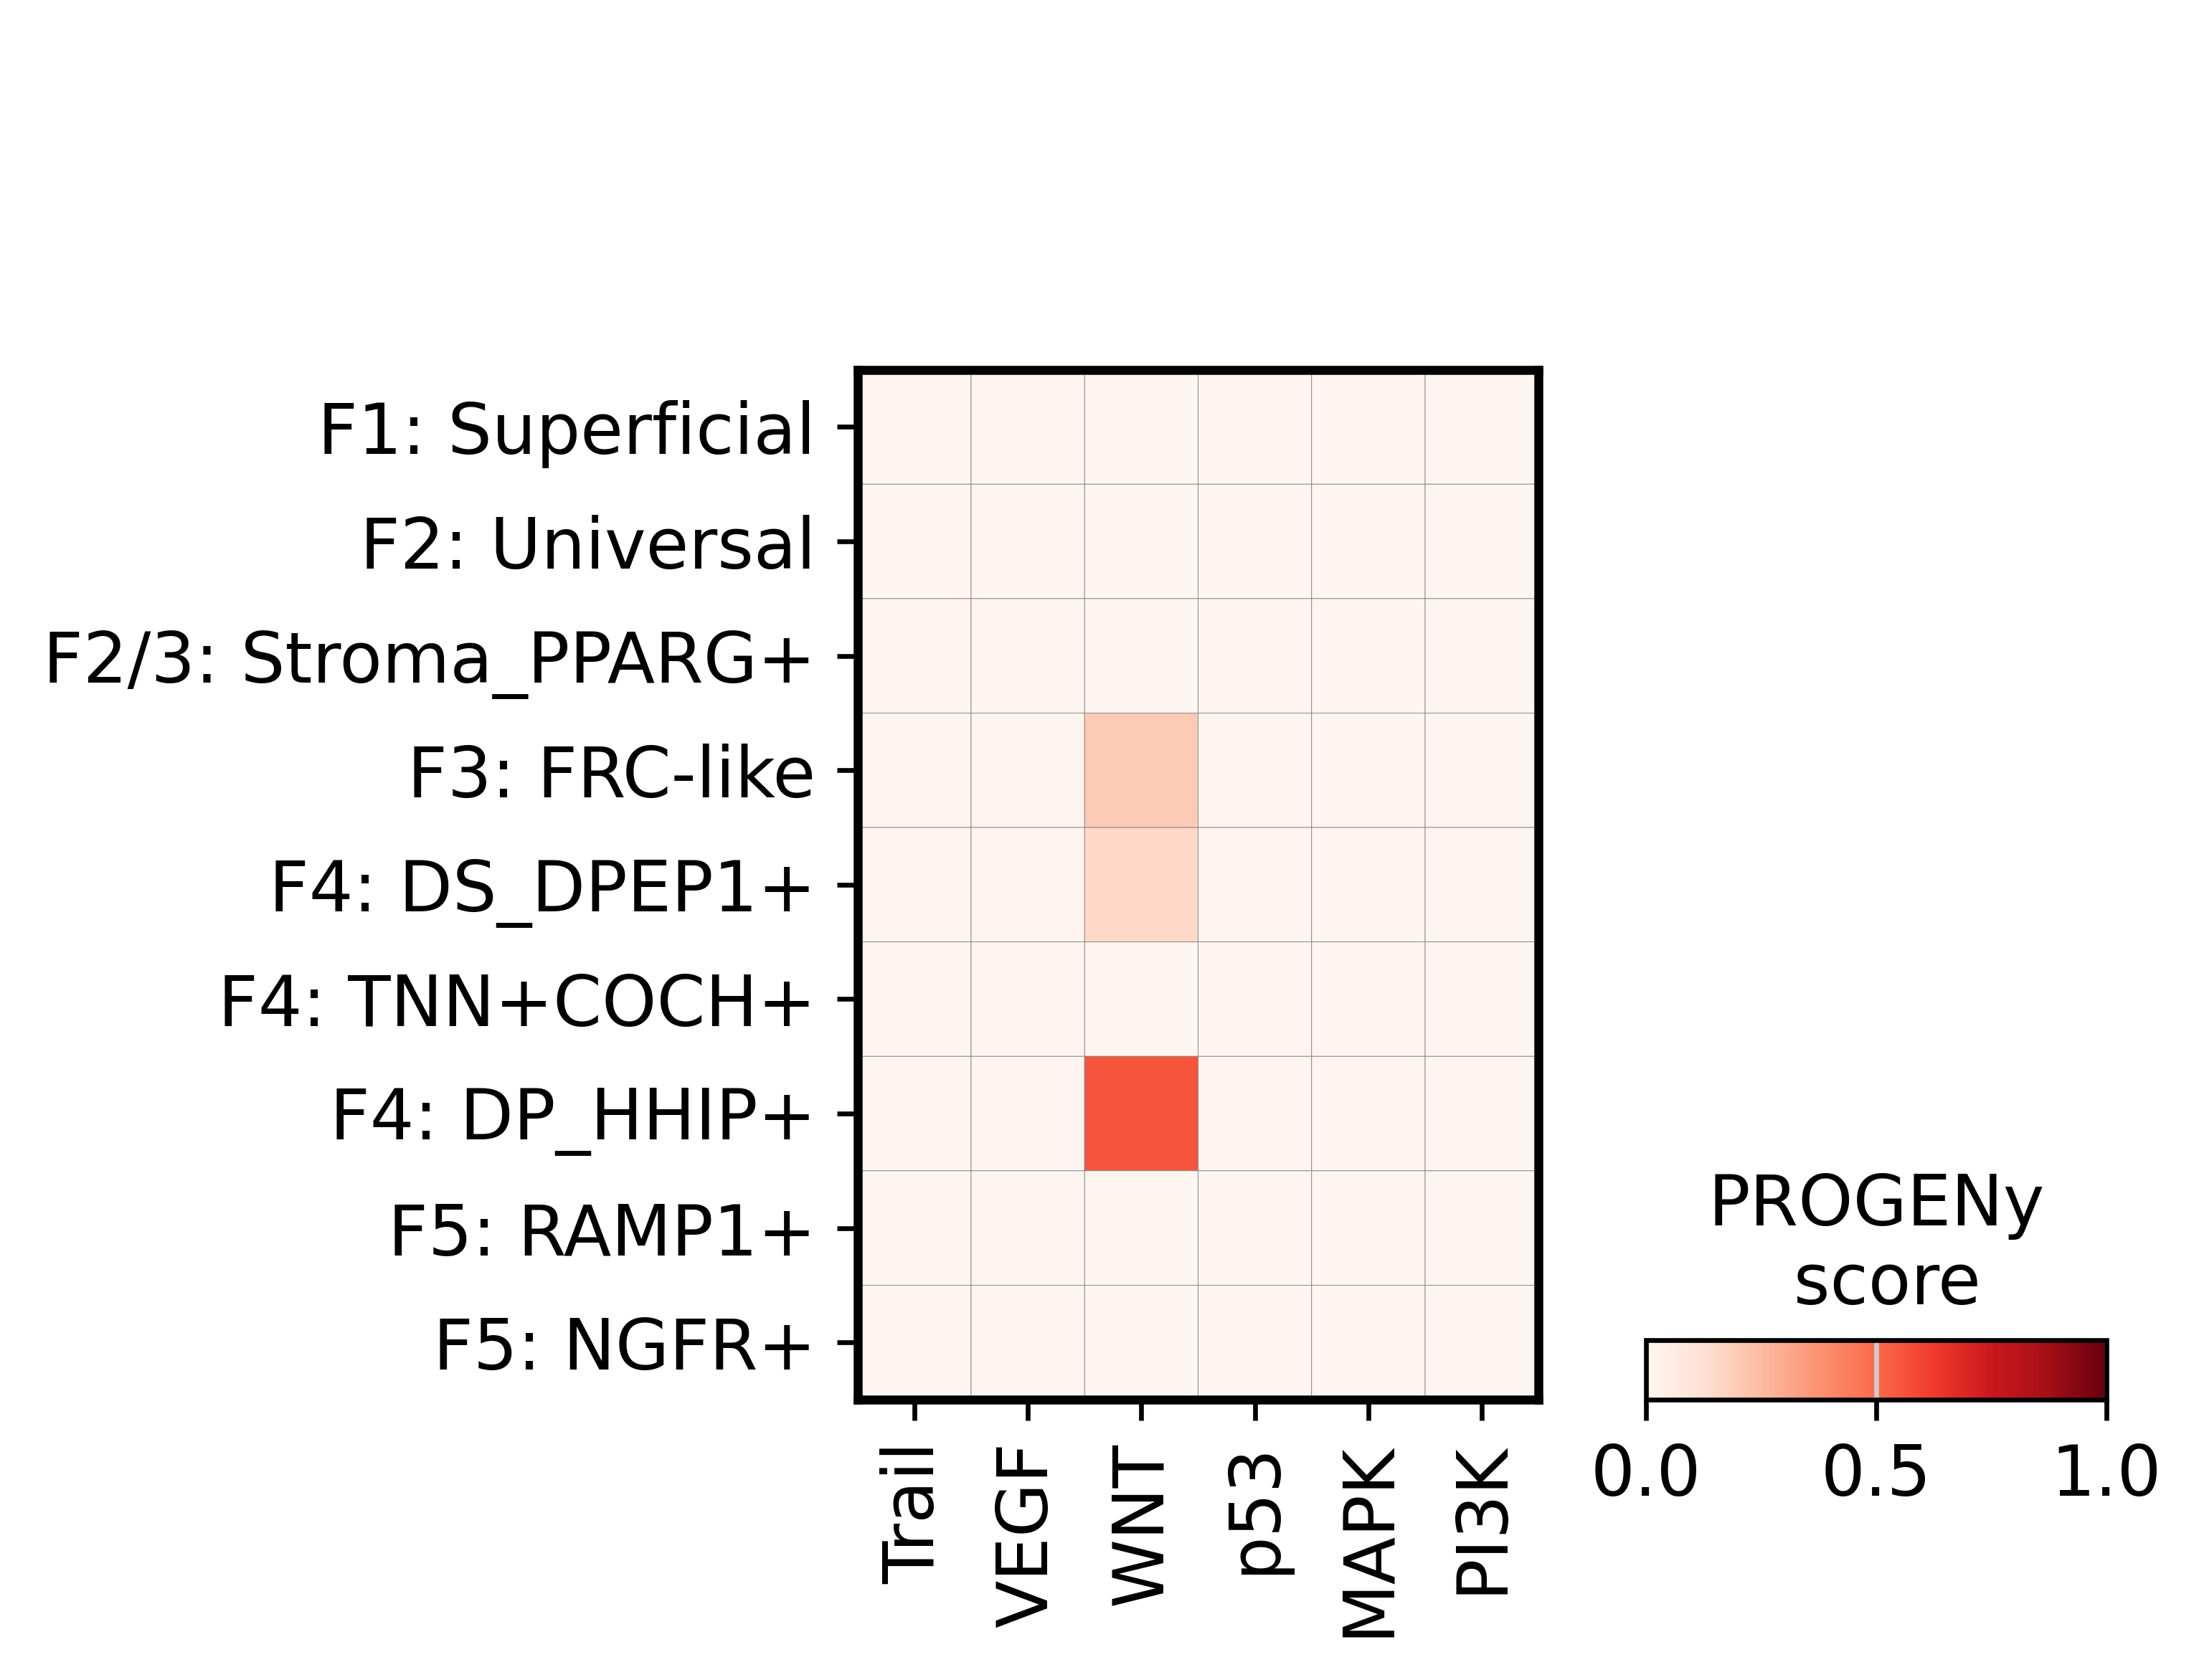

In [16]:
var_names_notgfb_low = ['Trail', 'VEGF', 'WNT', 'p53',  'MAPK', 'PI3K', ]
sc.pl.matrixplot(acts2, var_names=var_names_notgfb_low, groupby='corefb_names2',# dendrogram=True, 
                 vmax=1, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds',# swap_axes=True
                  save="fig3progeny_other_nonlesional3.png"
                )

# both

In [ ]:
PATHWAYS = list(acts.var_names)
PATHWAYS.remove("TGFb")
PATHWAYS


In [ ]:
VMAX_VAL=4
sc.pl.matrixplot(acts2, var_names=PATHWAYS, groupby='corefb_names2',# dendrogram=True, 
                 vmax=VMAX_VAL, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\nscore', 
                 cmap='Reds')

sc.pl.matrixplot(acts, var_names=PATHWAYS, groupby='test13',# dendrogram=True, 
                 vmax=VMAX_VAL, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\nscore', 
                 cmap='Reds')




In [ ]:
VMAX_VAL=12
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(18,18))

sc.pl.matrixplot(acts2, var_names='TGFb', groupby='corefb_names2', 
                 vmax=VMAX_VAL,  
                 vmin=0,colorbar_title='PROGENy\nscore', 
                 cmap='Reds', save="fig3progeny_tgfb_nonlesional.png")


sc.pl.matrixplot(acts, var_names='TGFb', groupby='test13',# dendrogram=True, 
                 vmax=VMAX_VAL, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\nscore', 
                 cmap='Reds', save="fig3progeny_tgfb_lesional.png")




In [ ]:
var_names_notgfb = [ 'Hypoxia','JAK-STAT', 'TNFa', 'Androgen', 'EGFR', 'Estrogen', 'NFkB',   ]#.pop("TGFb")

sc.pl.matrixplot(acts2, var_names=var_names_notgfb, groupby='corefb_names2',# dendrogram=True, 
                 vmax=4, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds',# swap_axes=True
                  save="fig3progeny_other_nonlesional2.png"
                )



sc.pl.matrixplot(acts, var_names=var_names_notgfb, groupby='test13',# dendrogram=True, 
                 vmax=4, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                  save="fig3progeny_other_lesional2.png",
                 cmap='Reds',#swap_axes=True
                )



In [ ]:
var_names_notgfb_low = ['Trail', 'VEGF', 'WNT', 'p53',  'MAPK', 'PI3K', ]
sc.pl.matrixplot(acts2, var_names=var_names_notgfb_low, groupby='corefb_names2',# dendrogram=True, 
                 vmax=1, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds',# swap_axes=True
                  save="fig3progeny_other_nonlesional3.png"
                )


sc.pl.matrixplot(acts, var_names=var_names_notgfb_low, groupby='test13',# dendrogram=True, 
                 vmax=1, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                  save="fig3progeny_other_lesional3.png",
                 cmap='Reds',#swap_axes=True
                )



In [ ]:
sc.pl.matrixplot(acts2, var_names=var_names_notgfb, groupby='corefb_names2',# dendrogram=True, 
                 vmax=5, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds', swap_axes=True
                )



sc.pl.matrixplot(acts, var_names=var_names_notgfb, groupby='test13',# dendrogram=True, 
                 vmax=5, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds', swap_axes=True
                )



In [ ]:
sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='corefb_names2',# dendrogram=True, 
                 vmax=5, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds')
# sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='disease_category',# dendrogram=True, 
#                  standard_scale='var', colorbar_title='Z-scaled scores', cmap='RdBu_r')
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='test13',# dendrogram=True, 
                 vmax=5, #colorbar_title='Z-scaled scores', 
                 vmin=0,colorbar_title='PROGENy\n score', 
                 cmap='Reds'
                )
# sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='disease_category',# dendrogram=True, 
#                  standard_scale='var', colorbar_title='Z-scaled scores', cmap='RdBu_r')

In [ ]:
sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='corefb_names2',# dendrogram=True, 
                 vmax=1,
                 colorbar_title='Z-scaled scores',   standard_scale='var',
                 vmin=0,
                 cmap='Reds')
# sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='disease_category',# dendrogram=True, 
#                  standard_scale='var', colorbar_title='Z-scaled scores', cmap='RdBu_r')
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='test13',# dendrogram=True, 
                 vmax=1, 
                 colorbar_title='Z-scaled scores',   standard_scale='var',
                 vmin=0,
                 cmap='Reds')
# sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='disease_category',# dendrogram=True, 
#                  standard_scale='var', colorbar_title='Z-scaled scores', cmap='RdBu_r')

In [ ]:
sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='corefb_names',# dendrogram=True, 
                 vmax=4, #colorbar_title='Z-scaled scores', 
                 vmin=0,
                 cmap='RdBu_r')
# sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='disease_category',# dendrogram=True, 
#                  standard_scale='var', colorbar_title='Z-scaled scores', cmap='RdBu_r')
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='test13',# dendrogram=True, 
                 vmax=3, #colorbar_title='Z-scaled scores', 
                 vmin=0,
                 cmap='RdBu_r')
# sc.pl.matrixplot(acts2, var_names=acts.var_names, groupby='disease_category',# dendrogram=True, 
#                  standard_scale='var', colorbar_title='Z-scaled scores', cmap='RdBu_r')